In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from PIL import Image
from tqdm import tqdm

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
data_dir = Path("/content/image")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels = [img.split(os.path.sep)[-1].split(".png")[0] for img in images]
characters = set(char for label in labels for char in label)            # set of all unique characters

print("Total images found: ", len(images))
print("Total labels found: ", len(labels))
print("Total number of unique characters: ", len(characters))
print("\n\nCharacter Vocabulary:\n", characters)

Total images found:  2606
Total labels found:  2606
Total number of unique characters:  62


Character Vocabulary:
 {'5', 'S', 's', '1', 'H', 'd', 'D', 'v', 'y', '4', 'h', 'o', 't', 'r', 'V', '7', 'g', 'T', 'n', 'p', 'J', 'G', 'Z', 'W', 'u', 'c', 'I', 'q', '9', 'z', 'B', 'U', 'j', '0', '2', 'M', 'N', 'F', '8', 'P', '3', 'w', 'O', 'm', 'Y', 'x', 'L', 'l', 'E', 'e', 'C', 'A', 'X', '6', 'K', 'R', 'f', 'b', 'Q', 'k', 'i', 'a'}


In [ ]:
images

['/content/image/01AGWO.png',
 '/content/image/01KGAW.png',
 '/content/image/028QYW.png',
 '/content/image/02MW4N.png',
 '/content/image/02OAB9.png',
 '/content/image/02PQMG.png',
 '/content/image/02UCW4.png',
 '/content/image/039WYA.png',
 '/content/image/03A8ZG.png',
 '/content/image/03SVZ6.png',
 '/content/image/03U3WP.png',
 '/content/image/04R3QM.png',
 '/content/image/04W3KY.png',
 '/content/image/05N8ON.png',
 '/content/image/05QCX7.png',
 '/content/image/05r3bw.png',
 '/content/image/06P5QC.png',
 '/content/image/06QM27.png',
 '/content/image/06R3M5.png',
 '/content/image/07DWVA.png',
 '/content/image/07MMS8.png',
 '/content/image/084WEO.png',
 '/content/image/0859WQ.png',
 '/content/image/087XUG.png',
 '/content/image/08LW9G.png',
 '/content/image/08W2AD.png',
 '/content/image/08W2SB.png',
 '/content/image/09526S.png',
 '/content/image/09MQ7A.png',
 '/content/image/0A936W.png',
 '/content/image/0AL863.png',
 '/content/image/0AMQM0.png',
 '/content/image/0AXJVM.png',
 '/content

In [ ]:
labels


['01AGWO',
 '01KGAW',
 '028QYW',
 '02MW4N',
 '02OAB9',
 '02PQMG',
 '02UCW4',
 '039WYA',
 '03A8ZG',
 '03SVZ6',
 '03U3WP',
 '04R3QM',
 '04W3KY',
 '05N8ON',
 '05QCX7',
 '05r3bw',
 '06P5QC',
 '06QM27',
 '06R3M5',
 '07DWVA',
 '07MMS8',
 '084WEO',
 '0859WQ',
 '087XUG',
 '08LW9G',
 '08W2AD',
 '08W2SB',
 '09526S',
 '09MQ7A',
 '0A936W',
 '0AL863',
 '0AMQM0',
 '0AXJVM',
 '0B5OS3',
 '0B9FGW',
 '0BBXO8',
 '0C369G',
 '0CQ9MZ',
 '0D6BXQ',
 '0DTWS6',
 '0ERO9W',
 '0G3CXV',
 '0G90OZ',
 '0GN6XJ',
 '0GWIX5',
 '0HQNMC',
 '0HWQV2',
 '0L8M3G',
 '0LQFW5',
 '0M8QB6',
 '0NOVWT',
 '0O5NY6',
 '0OW39K',
 '0QA9VQ',
 '0QSXVH',
 '0QWDD3',
 '0QWVUC',
 '0QWZHS',
 '0RGXZC',
 '0S4Q08',
 '0SB55W',
 '0SROW0',
 '0UWY48',
 '0VMOT8',
 '0W2D9V',
 '0W3DSI',
 '0WGQVX',
 '0WQ44M',
 '0WU8CX',
 '0WX03N',
 '0WXQUC',
 '0WYARS',
 '0WYJ95',
 '0X2X58',
 '0XHJGW',
 '0XR99O',
 '0Y4B2W',
 '0Y83WB',
 '0YRQ6W',
 '0YZEWO',
 '0Z6M9W',
 '0Z7P9W',
 '0ZB8VW',
 '0ZG6QO',
 '0jomax',
 '0qfm9x',
 '0sdq4k',
 '0v3DXP',
 '0vsqgd',
 '0ywrs8',
 '10wdoq',

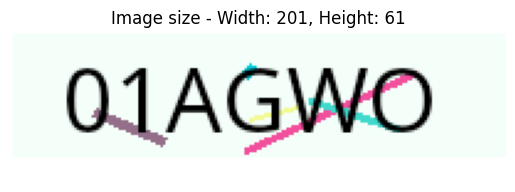

In [ ]:
image_path = images[0]
image = Image.open(image_path)

# Get the size of the image
img_width, img_height = image.size

# Display the image
plt.imshow(image)
plt.title(f"Image size - Width: {img_width}, Height: {img_height}")
plt.axis('off')
plt.show()

In [ ]:
# Maximum length of any captcha in the dataset

max_length = max([len(label) for label in labels])
print("Max Length of labels: ", max_length)

Max Length of labels:  6


In [ ]:

count1 = 0
for image_path in tqdm(images):
    # Open the image using PIL
    temp_image = Image.open(image_path)

    # Get the size of the image
    temp_width, temp_height = temp_image.size

    if (temp_width != img_width) or (temp_height != img_height):
        count1 += 1

print(f"Number of images whose size is not {img_width} X {img_height}: {count1}")

100%|██████████| 2606/2606 [00:00<00:00, 22256.43it/s]

Number of images whose size is not 201 X 61: 1104


In [ ]:

for label in tqdm(labels):
    count2 = 0
    if len(label) != max_length:
        count2 += 1

print(f"Number of images whose label size is not {max_length}: {count2}")

100%|██████████| 2606/2606 [00:00<00:00, 2166572.10it/s]

Number of images whose label size is not 6: 0


In [ ]:

# Mapping characters to integers
char_to_num = layers.StringLookup(
    vocabulary=list(characters), num_oov_indices=1, mask_token=None
)
# Number of out-of-vocabulary (OOV) is set at 1. The encoded integer 0 corresponds to all [UNK]
# characters outside the vocabulary

# Mapping integers back to original characters
num_to_char = layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)

In [ ]:

# Test string
dummy_label = "pPGP1"

# Convert string to integers using char_to_num
integer_sequence = char_to_num(tf.strings.unicode_split(dummy_label, input_encoding="UTF-8"))

# Convert integers back to string using num_to_char
reconstructed_string = tf.strings.reduce_join(num_to_char(integer_sequence), axis=-1)

# Print the results
print("Original Label:", dummy_label)
print("Integer Sequence:", integer_sequence.numpy())
print("Reconstructed Label:", reconstructed_string.numpy())

Original Label: pPGP1
Integer Sequence: [20 40 22 40  4]
Reconstructed Label: b'pPGP1'


In [ ]:
char_to_num_mapping = dict(zip(char_to_num.get_vocabulary(), range(char_to_num.vocabulary_size())))

# Get the vocabulary and indices from num_to_char
num_to_char_mapping = dict(zip(range(num_to_char.vocabulary_size()), num_to_char.get_vocabulary()))

# Print the mappings
print("Character to Integer Mapping:")
print(char_to_num_mapping)

print("\nInteger to Character Mapping:")
print(num_to_char_mapping)

Character to Integer Mapping:
{'[UNK]': 0, np.str_('5'): 1, np.str_('S'): 2, np.str_('s'): 3, np.str_('1'): 4, np.str_('H'): 5, np.str_('d'): 6, np.str_('D'): 7, np.str_('v'): 8, np.str_('y'): 9, np.str_('4'): 10, np.str_('h'): 11, np.str_('o'): 12, np.str_('t'): 13, np.str_('r'): 14, np.str_('V'): 15, np.str_('7'): 16, np.str_('g'): 17, np.str_('T'): 18, np.str_('n'): 19, np.str_('p'): 20, np.str_('J'): 21, np.str_('G'): 22, np.str_('Z'): 23, np.str_('W'): 24, np.str_('u'): 25, np.str_('c'): 26, np.str_('I'): 27, np.str_('q'): 28, np.str_('9'): 29, np.str_('z'): 30, np.str_('B'): 31, np.str_('U'): 32, np.str_('j'): 33, np.str_('0'): 34, np.str_('2'): 35, np.str_('M'): 36, np.str_('N'): 37, np.str_('F'): 38, np.str_('8'): 39, np.str_('P'): 40, np.str_('3'): 41, np.str_('w'): 42, np.str_('O'): 43, np.str_('m'): 44, np.str_('Y'): 45, np.str_('x'): 46, np.str_('L'): 47, np.str_('l'): 48, np.str_('E'): 49, np.str_('e'): 50, np.str_('C'): 51, np.str_('A'): 52, np.str_('X'): 53, np.str_('6')

In [ ]:

def split_data(images, labels, train_size=0.7, valid_size = 0.15, shuffle=True):
    size = len(images)
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)

    train_samples = int(size * train_size)
    valid_samples = int(size * valid_size)

    #print(train_samples, valid_samples)


    # Split data into training, validation and testing sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples: train_samples + valid_samples]], labels[indices[train_samples: train_samples + valid_samples]]
    x_test, y_test = images[indices[train_samples + valid_samples:]], labels[indices[train_samples + valid_samples:]]

    return x_train, x_valid, x_test, y_train, y_valid, y_test


# Splitting data into training and validation sets
x_train, x_valid, x_test, y_train, y_valid, y_test = split_data(np.array(images), np.array(labels))

In [ ]:
print(f"Size of x_train: {len(x_train)}")
print(f"Size of y_train: {len(y_train)}")
print(f"Size of x_valid: {len(x_valid)}")
print(f"Size of y_valid: {len(y_valid)}")
print(f"Size of x_test: {len(x_test)}")
print(f"Size of y_test: {len(y_test)}")

Size of x_train: 1824
Size of y_train: 1824
Size of x_valid: 390
Size of y_valid: 390
Size of x_test: 392
Size of y_test: 392


In [ ]:
def preprocess_image(img_path, label):
    img = tf.io.read_file(img_path)
    # Decode and convert to grayscale with a single channel
    img = tf.io.decode_jpeg(img, channels=1)
    # Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # Transpose the image because we want the time dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # Map the characters in label to numbers
    label = tf.cast(
    char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8")),
    tf.int32
    )

    # Return a dictionary of image mapped to its label as the model expects two inputs
    return {"image": img, "label": label}

In [ ]:

img_label = preprocess_image(images[0], labels[0])
img_label["image"].shape

TensorShape([201, 61, 1])

In [ ]:
# Batch size for training, validation and testing
batch_size = 64

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [ ]:
def preprocess_and_batch(dataset):
    return (dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                   .batch(batch_size)
                   .prefetch(buffer_size=tf.data.experimental.AUTOTUNE))

train_dataset = preprocess_and_batch(train_dataset)
validation_dataset = preprocess_and_batch(validation_dataset)
test_dataset = preprocess_and_batch(test_dataset)

In [ ]:
# Print dataset sizes
print(f"No. of batches in train_dataset: {tf.data.experimental.cardinality(train_dataset).numpy()}")
print(f"No. of batches in  validation_dataset: {tf.data.experimental.cardinality(validation_dataset).numpy()}")
print(f"No. of batches in  test_dataset: {tf.data.experimental.cardinality(test_dataset).numpy()}")

No. of batches in train_dataset: 29
No. of batches in  validation_dataset: 7
No. of batches in  test_dataset: 7


In [ ]:
# Checking the shape of images and labels in each batch

for batch in train_dataset:
    images = batch["image"]
    labels = batch["label"]
    print("Image Batch Shape: ", images.shape)
    print("Labels Batch Shape: ", labels.shape)
    #print(labels)
    break

Image Batch Shape:  (64, 201, 61, 1)
Labels Batch Shape:  (64, 6)


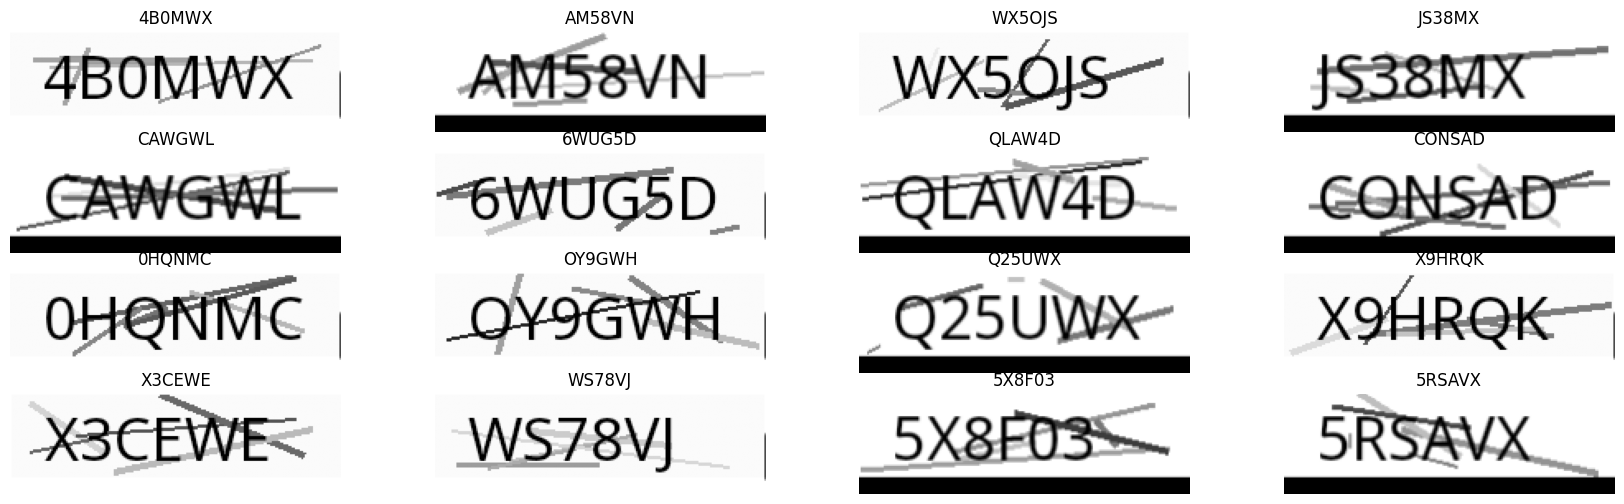

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(21, 6))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [ ]:
def residual_block(x, num_filters, kernel_size=(3, 3), activation="leaky_relu", kernel_initializer="he_normal", padding="same"):
    # Shortcut
    shortcut = x

    # First convolutional layer
    x = layers.Conv2D(num_filters, kernel_size, activation=activation, kernel_initializer= kernel_initializer, padding=padding)(x)
    x = layers.BatchNormalization()(x)

    # Second convolutional layer
    x = layers.Conv2D(num_filters, kernel_size, activation=None, kernel_initializer= kernel_initializer, padding=padding)(x)

    # Add shortcut to the output
    x = layers.Add()([x, shortcut])
    x = layers.Activation(activation)(x)
    x = layers.BatchNormalization()(x)

    return x

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
def OCR_model():
    # Inputs layer
    input_img = layers.Input(shape=(img_width, img_height, 1), name="image", dtype="float32")
    labels = layers.Input(name="label", shape=(None,), dtype="int32")

    # First block
    x = layers.Conv2D(32, (3, 3), activation="leaky_relu", kernel_initializer="he_normal", padding="same")(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = residual_block(x, 32)  # Add a residual block
    x = layers.Dropout(0.2)(x)
    x = residual_block(x, 32)  # Add a residual block
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second block
    x = layers.Conv2D(64, (3, 3), activation="leaky_relu", kernel_initializer="he_normal", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = residual_block(x, 64)  # Add a residual block
    x = layers.Dropout(0.2)(x)
    x = residual_block(x, 64)  # Add a residual block
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # Third block
    x = layers.Conv2D(128, (3, 3), activation="leaky_relu", kernel_initializer="he_normal", padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)
    x = residual_block(x, 128)  # Add a residual block
    x = layers.Dropout(0.2)(x)
    x = residual_block(x, 128)  # Add a residual block
    x = layers.MaxPooling2D((2, 2), name="pool3")(x)

    # Three max pool layers have been used with pool size and strides 2.
    # Hence, downsampled feature maps are 8x smaller. The number of
    # filters in the last layer is 128. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 8), (img_height // 8) * 128)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2))(x)

    # Output layer
    x = layers.Dense(len(characters) + 2, activation="softmax", name="dense2")(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="ocr_model_v2")

    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=0.001)

    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = OCR_model()
model.summary()

Model: "ocr_model_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 201, 61,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 201, 61,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 201, 61,   │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 201, 61,   │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 201, 61,   │      9,248 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 201, 61,   │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 201, 61,   │          0 │ conv2d_2[0][0],   │
│                     │ 32)               │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 201, 61,   │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ activation[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 201, 61,   │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 201, 61,   │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 201, 61,   │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 201, 61,   │          0 │ conv2d_4[0][0],   │
│                     │ 32)               │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 201, 61,   │          0 │ add_1[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ activation_1[0][

 Total params: 1,299,840 (4.96 MB)

 Trainable params: 1,297,600 (4.95 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [ ]:
epochs = 100
early_stopping_patience = 10

# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Add ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=5, verbose=1, mode="min", min_lr=1e-7,
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr],
)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 601ms/step - loss: 2783.0520 - val_loss: 1475.2281 - learning_rate: 0.0010
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 491ms/step - loss: 1482.5131 - val_loss: 1451.3877 - learning_rate: 0.0010
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 500ms/step - loss: 1470.2241 - val_loss: 1448.4430 - learning_rate: 0.0010
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 614ms/step - loss: 1463.9792 - val_loss: 1452.8254 - learning_rate: 0.0010
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 539ms/step - loss: 1448.5531 - val_loss: 1455.6477 - learning_rate: 0.0010
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 527ms/step - loss: 1414.7140 - val_loss: 1462.5021 - learning_rate: 0.0010
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 519ms/step - loss: 1378.2272 - val_loss: 1462.6910 - learning_rate: 0.0010
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 518ms/step - loss: 1296.5509 - val_loss: 1430.2617 - learning_rate: 0.0010
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 507ms/step - 

In [ ]:
additional_epochs = 10

history_additional = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs + additional_epochs,  # Set the total number of epochs
    callbacks=[early_stopping, reduce_lr],
    initial_epoch=epochs,  # Specify the starting epoch (optional)
)

Epoch 101/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 514ms/step - loss: 70.7247 - val_loss: 72.9809 - learning_rate: 1.0000e-04
Epoch 102/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 525ms/step - loss: 69.8912 - val_loss: 73.2495 - learning_rate: 1.0000e-04
Epoch 103/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 500ms/step - loss: 70.1189 - val_loss: 72.9735 - learning_rate: 1.0000e-04
Epoch 104/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 483ms/step - loss: 69.8899 - val_loss: 73.3282 - learning_rate: 1.0000e-04
Epoch 105/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 480ms/step - loss: 69.8072 - val_loss: 72.6594 - learning_rate: 1.0000e-04
Epoch 106/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 482ms/step - loss: 70.2533 - val_loss: 72.7559 - learning_rate: 1.0000e-04
Epoch 107/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 485ms/step - loss: 69.2029 - val_loss: 72.3197 - learning_rate: 1.0000e-04
Epoch 108/110
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 512ms/step - loss: 68.9659 - val_loss: 72.2165 - learning_rate: 1.0000e-04
Epoch 109/110
29/29 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
additional_epochs2 = 10
new_learning_rate = 0.0001  # Manually enforcing reduced learning rate

# Change the learning rate in the optimizer
model.optimizer.learning_rate.assign(new_learning_rate)

# Continue training for additional epochs
additional_history2 = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs + additional_epochs + additional_epochs2,
    callbacks=[early_stopping, reduce_lr],
    initial_epoch=epochs + additional_epochs
)

Epoch 111/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 491ms/step - loss: 69.2045 - val_loss: 72.1524 - learning_rate: 1.0000e-04
Epoch 112/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 496ms/step - loss: 69.8155 - val_loss: 73.3729 - learning_rate: 1.0000e-04
Epoch 113/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 490ms/step - loss: 69.9932 - val_loss: 72.5945 - learning_rate: 1.0000e-04
Epoch 114/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 490ms/step - loss: 69.1495 - val_loss: 73.3583 - learning_rate: 1.0000e-04
Epoch 115/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - loss: 68.9715 - val_loss: 73.6376 - learning_rate: 1.0000e-04
Epoch 116/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - loss: 68.6284
Epoch 116: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 487ms/step - loss: 68.7071 - val_loss: 72.5854 - learning_rate: 1.0000e-04
Epoch 117/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 499ms/step - loss: 69.8815 - val_loss: 72.5282 - learning_rate: 5.0000e-05
Epoch 118/120
29/29 ━━━━━

In [ ]:
additional_epochs3 = 55
new_learning_rate = 0.00001  # Manually enforcing reduced learning rate

# Change the learning rate in the optimizer
model.optimizer.learning_rate.assign(new_learning_rate)

# Continue training for additional epochs
additional_history3 = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs + additional_epochs + additional_epochs2 + additional_epochs3,
    callbacks=[early_stopping, reduce_lr],
    initial_epoch=epochs + additional_epochs + additional_epochs2
)

Epoch 121/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 487ms/step - loss: 68.7709 - val_loss: 72.0561 - learning_rate: 1.0000e-05
Epoch 122/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - loss: 68.4624 - val_loss: 72.0222 - learning_rate: 1.0000e-05
Epoch 123/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 500ms/step - loss: 68.8578 - val_loss: 71.9895 - learning_rate: 1.0000e-05
Epoch 124/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 490ms/step - loss: 68.3793 - val_loss: 71.9629 - learning_rate: 1.0000e-05
Epoch 125/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 486ms/step - loss: 68.3422 - val_loss: 71.9746 - learning_rate: 1.0000e-05
Epoch 126/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 482ms/step - loss: 68.5501 - val_loss: 71.9790 - learning_rate: 1.0000e-05
Epoch 127/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 488ms/step - loss: 67.7091 - val_loss: 72.0260 - learning_rate: 1.0000e-05
Epoch 128/175
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 500ms/step - loss: 69.0674 - val_loss: 71.9776 - learning_rate: 1.0000e-05
Epoch 129/175
29/29 ━━━━━━━━━━━━━━━━━━━━

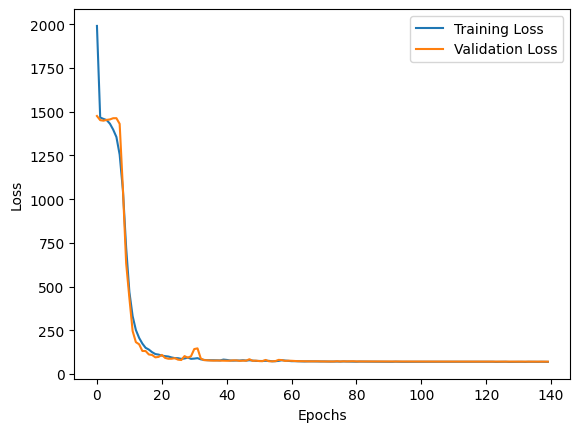

In [ ]:
combined_history = {}
for key in history.history:
    combined_history[key] = history.history[key] + history_additional.history[key] + additional_history2.history[key] + additional_history3.history[key]



# Plot the combined loss curve

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 201, 61,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 201, 61,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 201, 61,   │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 201, 61,   │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 201, 61,   │      9,248 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 201, 61,   │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 201, 61,   │          0 │ conv2d_2[0][0],   │
│                     │ 32)               │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 201, 61,   │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ activation[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 201, 61,   │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 201, 61,   │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 201, 61,   │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 201, 61,   │          0 │ conv2d_4[0][0],   │
│                     │ 32)               │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 201, 61,   │          0 │ add_1[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 201, 61,   │        128 │ activation_1[0][

 Total params: 1,299,840 (4.96 MB)

 Trainable params: 1,297,600 (4.95 MB)

 Non-trainable params: 2,240 (8.75 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


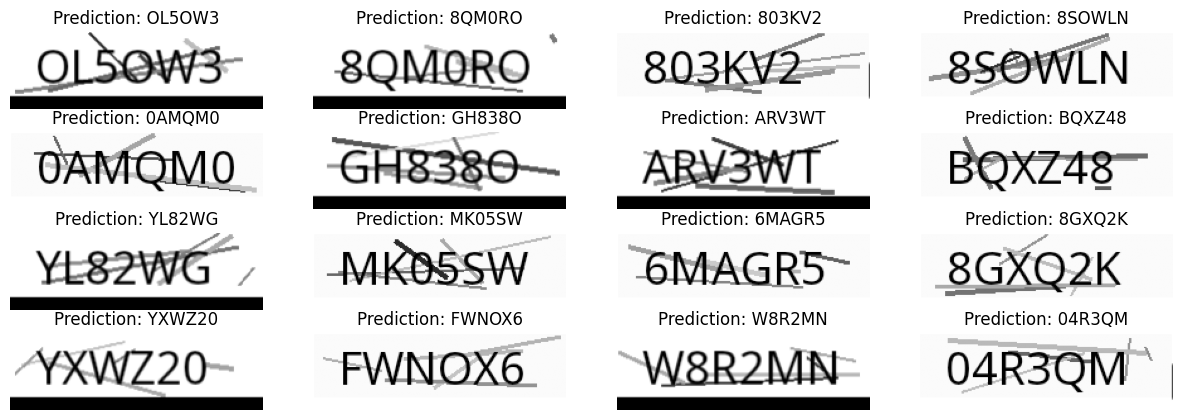

In [ ]:
# Get the prediction model by extracting layers till the output layer
# prediction_model = keras.models.Model(
#     model.get_layer(name="image").input, model.get_layer(name="dense2").output
# )
prediction_model = keras.Model(model.inputs[0], model.layers[-2].output)

prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in test_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    #for i in range(len(pred_texts)):
    for i in range(16):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:

correct_predictions_Global = 0
total_samples_Global = 0


for batch in test_dataset:
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for pred_text, label_text in zip(pred_texts, batch_labels):
        label_text = tf.strings.reduce_join(num_to_char(label_text)).numpy().decode("utf-8")
        total_samples_Global += 1

        if pred_text == label_text:
            correct_predictions_Global += 1


# Calculate Global accuracy
global_accuracy = correct_predictions_Global / total_samples_Global
print(f"\n\n\n\nOverall Global Accuracy: {global_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step




Overall Global Accuracy: 92.35%


In [ ]:
test_dataset

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 201, 61, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}>

In [ ]:
results = []
def decode_labels(labels):
    texts = []
    for label in labels:
        chars = num_to_char(label)
        text = tf.strings.reduce_join(chars).numpy().decode("utf-8")
        texts.append(text)
    return texts
for batch in validation_dataset:
    preds = prediction_model.predict(batch["image"])

    pred_texts = decode_batch_predictions(preds)
    true_texts = decode_labels(batch["label"])

    for t, p in zip(true_texts, pred_texts):
        results.append([t, p, t == p])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
import pandas as pd
df = pd.DataFrame(results, columns=["Actual", "Predicted", "Correct"])

In [ ]:
df

,Actual,Predicted,Correct
0,8VQAFM,8VQAFM,True
1,WMVYDQ,WMVYDQ,True
2,GG2WDK,GG2WDK,True
3,3QKC62,3QKC62,True
4,QO9XBQ,QO9XBQ,True
...,...,...,...
385,SKQKBM,SKQKBM,True
386,8DQMWG,8DQMWG,True
387,WQBLAV,WQBLAV,True
388,s65suw,S65SUW,False


In [ ]:
metric_df=df.copy()

In [ ]:
metric_df["Actual_normalized"] = metric_df["Actual"].str.upper().str.replace(" ", "", regex=False)

In [ ]:
metric_df.head()

,Actual,Predicted,Correct,Actual_normalized
0,8VQAFM,8VQAFM,True,8VQAFM
1,WMVYDQ,WMVYDQ,True,WMVYDQ
2,GG2WDK,GG2WDK,True,GG2WDK
3,3QKC62,3QKC62,True,3QKC62
4,QO9XBQ,QO9XBQ,True,QO9XBQ


In [ ]:
metric_df["Status"]=metric_df["Actual_normalized"]==metric_df["Predicted"]

In [ ]:
metric_df.value_counts("Status")

,count
Status,
True,390


Model_Inference

In [95]:
def preprocess_image_infer(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_png(img, channels=1)
    img = tf.image.resize(img, [img_height, img_width])
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.transpose(img, perm=[1,0,2])
    return img

# def predict_image(path):

#     img = preprocess_image_infer(path)
#     img = tf.expand_dims(img, axis=0)

#     pred = prediction_model.predict(img)
#     text = decode_batch_predictions(pred)[0]

#     return text


# print(predict_image("/content/89NBB8.png"))


# =========================
# FOLDER INFERENCE
# =========================
def predict_folder(folder):

    images = []
    names = []

    for file in os.listdir(folder):
        path = os.path.join(folder,file)

        images.append(preprocess_image_infer(path))
        names.append(file)

    images = tf.stack(images)

    preds = prediction_model.predict(images)
    texts = decode_batch_predictions(preds)

    df = pd.DataFrame({
        "Image": names,
        "Prediction": texts
    })

    return df

temp_df = predict_folder("/content/image_inference")
print(temp_df)

102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step
           Image  Prediction
0     LHEZKA.png      LHEZKA
1     T5BIB4.png      T5BIB4
2     iEHE83.png      IEHE83
3     ZEU9J2.png      ZEU9J2
4     LRLYA7.png      LRLYA7
...          ...         ...
3252  1L3Y3B.png      1L3Y3B
3253  elsb17.png      ELSB17
3254  5JBP15.png      5JBP15
3255  9E451T.png      9E451T
3256  FTZCNT.png  FZCNT[UNK]

[3257 rows x 2 columns]


In [96]:
model_inference_df=temp_df.copy()

In [97]:
model_inference_df

,Image,Prediction
0,LHEZKA.png,LHEZKA
1,T5BIB4.png,T5BIB4
2,iEHE83.png,IEHE83
3,ZEU9J2.png,ZEU9J2
4,LRLYA7.png,LRLYA7
...,...,...
3252,1L3Y3B.png,1L3Y3B
3253,elsb17.png,ELSB17
3254,5JBP15.png,5JBP15
3255,9E451T.png,9E451T


In [98]:
model_inference_df['Actual'] = model_inference_df['Image'].str[:-4].str.upper()

In [99]:
model_inference_df

,Image,Prediction,Actual
0,LHEZKA.png,LHEZKA,LHEZKA
1,T5BIB4.png,T5BIB4,T5BIB4
2,iEHE83.png,IEHE83,IEHE83
3,ZEU9J2.png,ZEU9J2,ZEU9J2
4,LRLYA7.png,LRLYA7,LRLYA7
...,...,...,...
3252,1L3Y3B.png,1L3Y3B,1L3Y3B
3253,elsb17.png,ELSB17,ELSB17
3254,5JBP15.png,5JBP15,5JBP15
3255,9E451T.png,9E451T,9E451T


In [100]:
model_inference_df["Status"]=model_inference_df["Prediction"]==model_inference_df["Actual"]

In [101]:
model_inference_df[model_inference_df["Status"]==False]

,Image,Prediction,Actual,Status
28,LJJFXO.png,LJFXO[UNK],LJJFXO,False
35,LTHNPS.png,LHNPS[UNK],LTHNPS,False
96,tjjua7.png,TJUA7[UNK],TJJUA7,False
102,jcnltu.png,JCNLU[UNK],JCNLTU,False
107,KIIVRF.png,KIVRF[UNK],KIIVRF,False
...,...,...,...,...
3177,FII6LV.png,FI6LV[UNK],FII6LV,False
3189,LTY1AI.png,LDY1AI,LTY1AI,False
3217,KBIJJZ.png,KBIJZ[UNK],KBIJJZ,False
3231,1LTDZM.png,1LDZM[UNK],1LTDZM,False


**Metrics Evaluation**

Exact Match Accuracy (Word Accuracy)

Measures: How many CAPTCHAs are 100% correct.

In [103]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score, f1_score

metric_df = model_inference_df.copy()

predictions = metric_df["Prediction"].astype(str).tolist()
truths = metric_df["Actual"].astype(str).tolist()
def exact_match_accuracy(predictions, truths):
    correct = sum(p == t for p, t in zip(predictions, truths))
    return correct / len(truths)

exact_acc = exact_match_accuracy(predictions, truths)

print("\n🔷 Exact Match Accuracy")
print(f"Value: {exact_acc:.4f}")



🔷 Exact Match Accuracy
Value: 0.9460


Character Accuracy

Measures: How many characters are correct overall.

In [105]:
def character_accuracy(predictions, truths):
    total_chars = 0
    correct_chars = 0

    for p, t in zip(predictions, truths):
        total_chars += len(t)
        min_len = min(len(p), len(t))
        for i in range(min_len):
            if p[i] == t[i]:
                correct_chars += 1

    return correct_chars / total_chars

char_acc = character_accuracy(predictions, truths)

print("\n🔷 Character Accuracy")
print(f"Value: {char_acc:.4f}")


🔷 Character Accuracy
Value: 0.9729


Levenshtein Distance (Per Sample)

Measures: Number of edits per sample.

In [106]:
def levenshtein_distance(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0]*(n+1) for _ in range(m+1)]

    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j

    for i in range(1, m+1):
        for j in range(1, n+1):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            dp[i][j] = min(
                dp[i-1][j] + 1,
                dp[i][j-1] + 1,
                dp[i-1][j-1] + cost
            )
    return dp[m][n]

# Example print for first 5
print("\n🔷 Sample Edit Distances")
for i in range(5):
    dist = levenshtein_distance(predictions[i], truths[i])
    print(f"{predictions[i]} vs {truths[i]} → Distance: {dist}")




🔷 Sample Edit Distances
LHEZKA vs LHEZKA → Distance: 0
T5BIB4 vs T5BIB4 → Distance: 0
IEHE83 vs IEHE83 → Distance: 0
ZEU9J2 vs ZEU9J2 → Distance: 0
LRLYA7 vs LRLYA7 → Distance: 0


Character Error Rate (CER)

Measures: Average character-level error.

In [107]:
def character_error_rate(predictions, truths):
    total_edits = 0
    total_chars = 0

    for p, t in zip(predictions, truths):
        total_edits += levenshtein_distance(p, t)
        total_chars += len(t)

    return total_edits / total_chars

cer = character_error_rate(predictions, truths)

print("\n🔷 Character Error Rate (CER)")
print(f"Value: {cer:.4f}")



🔷 Character Error Rate (CER)
Value: 0.0491


Average Length Error

Measures: Difference in predicted vs actual string length.

In [110]:
def average_length_error(predictions, truths):
    errors = [abs(len(p) - len(t)) for p, t in zip(predictions, truths)]
    return np.mean(errors)

length_error = average_length_error(predictions, truths)
print("Average Length Error:", round(length_error, 4))

Average Length Error: 0.199


Precision, Recall, F1 (Character-Level)

In [112]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = []
y_pred = []

for p, t in zip(predictions, truths):
    min_len = min(len(p), len(t))
    y_true.extend(list(t[:min_len]))
    y_pred.extend(list(p[:min_len]))

precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

Precision: 0.9506
Recall: 0.9464
F1 Score: 0.9485


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix Shape:", cm.shape)


Confusion Matrix Shape: (37, 37)


In [117]:
import tensorflow as tf
import numpy as np

def print_activation_stats(model, sample_batch):
    intermediate_model = tf.keras.Model(
        inputs=model.input,
        outputs=[layer.output for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
    )

    outputs = intermediate_model(sample_batch)

    print("\n🔷 CNN Activation Statistics")
    for i, out in enumerate(outputs):
        mean = tf.reduce_mean(out).numpy()
        var = tf.math.reduce_variance(out).numpy()
        print(f"Layer {i} → Mean: {mean:.4f}, Variance: {var:.4f}")

print_activation_stats(model, sample_batch)

NameError: name 'sample_batch' is not defined

In [118]:
print("\n🔷 CTC Loss")

final_train_loss = history.history["loss"][-1]
final_val_loss = history.history["val_loss"][-1]

print("Final Training Loss:", round(final_train_loss, 4))
print("Final Validation Loss:", round(final_val_loss, 4))


🔷 CTC Loss
Final Training Loss: 72.2462
Final Validation Loss: 73.688


In [120]:
import numpy as np
import tensorflow as tf

def top_k_accuracy(model, X, y_true, k=3):
    y_pred = model.predict(X)

    input_len = np.ones(y_pred.shape[0]) * y_pred.shape[1]

    decoded, _ = tf.keras.backend.ctc_decode(
        y_pred,
        input_length=input_len,
        greedy=False,
        beam_width=k,
        top_paths=k
    )

    decoded = decoded[0].numpy()

    correct = 0
    for i in range(len(y_true)):
        if y_true[i] in decoded[i]:
            correct += 1

    acc = correct / len(y_true)

    print(f"\n🔷 Top-{k} Accuracy:", round(acc, 4))
    return acc

top_k_accuracy(model, x_test, y_test, k=3)


ValueError: Invalid dtype: str800

In [126]:
import time

start = time.time()

for batch in test_dataset:
    images = batch["image"] if isinstance(batch, dict) else batch[0]
    _ = prediction_model.predict(images, verbose=0)

end = time.time()

total_time = end - start

print("\n🔷 Total Inference Time")
print("Total Time (seconds):", round(total_time, 4))


🔷 Total Inference Time
Total Time (seconds): 2.585


<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 201, 61, 1), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}>

In [127]:
total_samples = 0

for batch in test_dataset:
    images = batch["image"] if isinstance(batch, dict) else batch[0]
    total_samples += images.shape[0]

latency = total_time / total_samples

print("\n🔷 Inference Latency")
print("Latency per Image (seconds):", round(latency, 6))



🔷 Inference Latency
Latency per Image (seconds): 0.006594


In [128]:
throughput = total_samples / total_time

print("\n🔷 Throughput")
print("Images per Second:", round(throughput, 2))


🔷 Throughput
Images per Second: 151.64


In [129]:
import numpy as np

all_confidences = []

for batch in test_dataset:
    images = batch["image"] if isinstance(batch, dict) else batch[0]
    y_pred = prediction_model.predict(images, verbose=0)

    max_probs = np.max(y_pred, axis=-1)
    batch_conf = np.mean(max_probs, axis=1)

    all_confidences.extend(batch_conf)

avg_confidence = np.mean(all_confidences)

print("\n🔷 Prediction Confidence")
print("Average Confidence:", round(avg_confidence, 4))



🔷 Prediction Confidence
Average Confidence: 0.9875


New Batch

In [136]:
import os
import cv2
import numpy as np

def load_new_batch(folder_path, img_width=201, img_height=61):
    images = []
    image_names = []

    for file in os.listdir(folder_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            path = os.path.join(folder_path, file)

            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_width, img_height))
            img = img / 255.0
            img = np.expand_dims(img, axis=-1)

            # If you used transpose during training:
            img = np.transpose(img, (1, 0, 2))

            images.append(img)
            image_names.append(file)

    return np.array(images), image_names

# Example:
new_images, image_names = load_new_batch("/content/new_image")

print("Loaded New Batch Shape:", new_images.shape)


Loaded New Batch Shape: (961, 201, 61, 1)


In [137]:

import time

start = time.time()

y_pred = prediction_model.predict(new_images, verbose=0)

end = time.time()

total_time = end - start

print("\n🔷 Total Inference Time (New Batch)")
print("Total Time (seconds):", round(total_time, 4))



🔷 Total Inference Time (New Batch)
Total Time (seconds): 1.3447


In [135]:
len(image_names)

193